# Isolated word correction - tolerant retrieval

NO consideration for context. Returns the words in the lexicon closest to the word we're checking.

## Types
1. Edit distance
2. Weighted edit distance
3. ngram overlap

# Edit distance
See lecture notes, use DP grid to find out what is the cost we should set at each grid.  
  
To find optimal path, always find where the optimal square is "carried" into the next result.

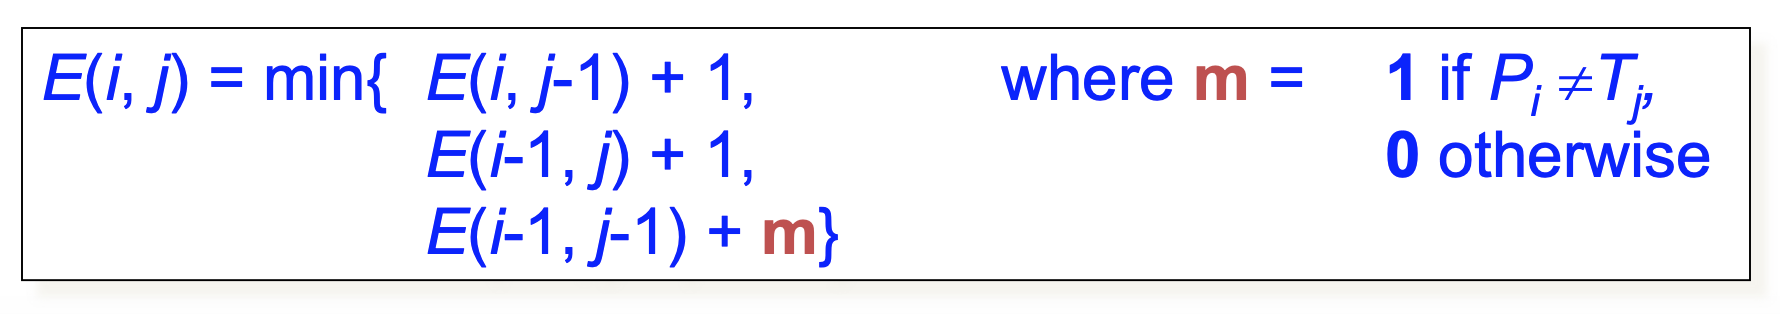
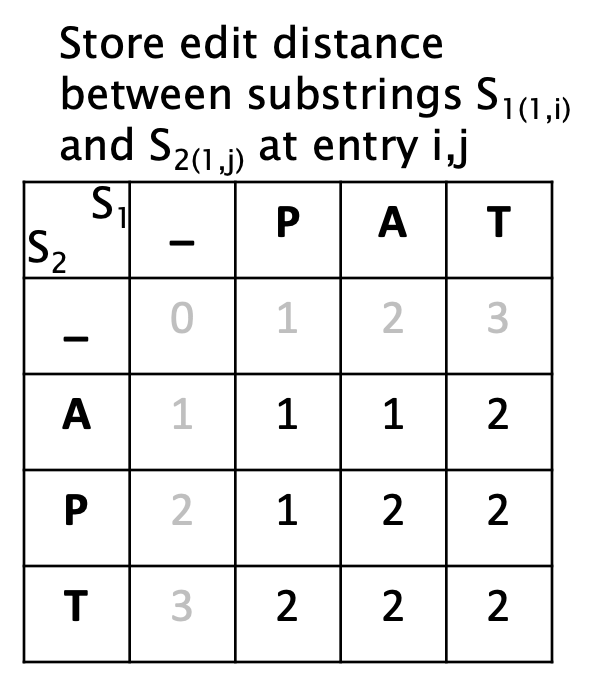

## Downsides
1. Extremely slow as we need to perform edit distance for every single vocab

In [2]:
import nltk

mistake = "ligting"

words = ['apple', 'bag', 'drawing', 'listing', 'linking', 'living', 'lighting', 'orange', 'walking', 'zoo']

for word in words:
    ed = nltk.edit_distance(mistake, word)
    print(word, ed)

apple 7
bag 6
drawing 4
listing 1
linking 2
living 2
lighting 1
orange 6
walking 4
zoo 7


# Weighted edit distance

Meant to capture keyboard or OCR errors. Takes into consideration of keyboards  
replacing `m` by `n` has a smaller edit distance than `q` since `q` is further away from `m` or `n`.

# Jaccard distance

A tool for measuring the similarity based on set theory

`|X AND Y|/|X OR Y|`

In [2]:
import nltk

mistake = "ligting"

words = ['apple', 'bag', 'drawing', 'listing', 'linking', 'living', 'lighting', 'orange', 'walking', 'zoo']

for word in words:
    jd = nltk.jaccard_distance(set(mistake), set(word))
    print(word, jd)
    
# Least means better

apple 0.875
bag 0.8571428571428571
drawing 0.6666666666666666
listing 0.16666666666666666
linking 0.3333333333333333
living 0.3333333333333333
lighting 0.16666666666666666
orange 0.7777777777777778
walking 0.5
zoo 1.0


# Ngram overlap

### Steps
1. Enumerate all the ngrams in the query string as well as in the lexicon
2. Use the ngram index to retrieve all the lexicon terms matching any of the query terms - AND operators
3. Threshold by number of matching ngrams


### Formula - Jaccard coefficient
`|X AND Y|/|X OR Y|`

`X` and `Y` are ngrams of the query terms. They are sets.


#### Example
Suppose we have `X` = November and `Y` = December.  
3 trigrams overlap out of 9 (total) == `emb`, `mbe`, `ber`.  
Universal set: `nov`, `ove`, `vem`, `emb`, `mbe`, `ber`, `dec`, `ece`, `cem`  
  
To make this useable with the boolean retrieval functions, we can sort them first based on their lexicographical order

##### Calculating jaccard coefficient
`3/9`  
We can also threshold the minimum matches before actually calculating the jaccard coefficient. eg. minimum `2 matches`


### Matching bigrams
eg. given the word `lord` - we wish to identify words matching to *2 or more* of its 3 bigrams

- `lo` - alone -> lord -> sloth
- `or` - border -> lord -> morbid
- `rd` - ardent -> border -> card

Therefore, `border` and `lord` shall be returned


### Handling spelling mistakes caused by transpositions
Although matching ngrams wont match transpositions, there is still a potential for the *slightly* transposed word to be considered especially if the word is long and the other ngrams matches those in the ngram word list. *However*, if the word is short or majority of the word is transposed, then we will be unlikely to get a match especially if **threshold is set to a high number**.

In [2]:
import nltk

sent1 = "It might help to re-install Python if possible."
sent2 = "It can help to install Python again if possible."
sent3 = "It can be so helpful to reinstall C++ if possible."
sent4 = "help It possible Python to re-install if might." # This has the same words as sent1 with a different order.
sent5 = "I love Python programming."


ng1_chars = set(nltk.ngrams(sent1, n=2))
ng2_chars = set(nltk.ngrams(sent2, n=2))
ng3_chars = set(nltk.ngrams(sent3, n=2))
ng4_chars = set(nltk.ngrams(sent4, n=2))
ng5_chars = set(nltk.ngrams(sent5, n=2))

jd_sent_1_2 = nltk.jaccard_distance(ng1_chars, ng2_chars)
jd_sent_1_3 = nltk.jaccard_distance(ng1_chars, ng3_chars)
jd_sent_1_4 = nltk.jaccard_distance(ng1_chars, ng4_chars)
jd_sent_1_5 = nltk.jaccard_distance(ng1_chars, ng5_chars)

print(jd_sent_1_2, "Jaccard Distance between sent1 and sent2 with ngram 2")
print(jd_sent_1_3, "Jaccard Distance between sent1 and sent3 with ngram 2")
print(jd_sent_1_4, "Jaccard Distance between sent1 and sent4 with ngram 2")
print(jd_sent_1_5, "Jaccard Distance between sent1 and sent5 with ngram 2")


0.3076923076923077 Jaccard Distance between sent1 and sent2 with ngram 2
0.4918032786885246 Jaccard Distance between sent1 and sent3 with ngram 2
0.10416666666666667 Jaccard Distance between sent1 and sent4 with ngram 2
0.8333333333333334 Jaccard Distance between sent1 and sent5 with ngram 2
